# Cosmological Plots for Cosmolunch App

This notebook demonstrates key cosmological quantities using the [CLASS](http://class-code.net/) code. The following plots correspond to figures from *Dodelson, Modern Cosmology* and are intended to help visualize the evolution of the universe.
*These plots will serve as the foundation for the streaming features in the Cosmolunch app.*


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
from scipy import interpolate
from classy import Class
import matplotlib
import healpy as hp
from matplotlib.patches import FancyArrowPatch

In [32]:
h = 0.67    
Omega_m = 0.315
Omega_b = 0.049
n_s = 0.96
sigma8 = 0.8
# Initialize CLASS
cosmo = Class()
common_settings = {
    'h': h,
    'omega_b': Omega_b * h**2,
    'omega_cdm': Omega_m * h**2 - Omega_b * h**2,
    'n_s': n_s,
    'sigma8': sigma8,
    'output': 'mPk,tCl,pCl,lCl',
    'P_k_max_1/Mpc': 10.0,
    'l_max_scalars': 2500,
    'tau_reio': 0.054,
}
cosmo.set(common_settings)
cosmo.compute()
halofit = Class()
halofit.set(common_settings)
halofit.set({
'non linear': 'halofit',
})
halofit.compute()



---

## 1. Matter Power Spectrum 
**(Corresponds to Figure 8.14 in Dodelson)**  
- Plot the matter power spectrum, $P(k)$, as a function of wavenumber ($k$).
- Compare the various methods, including linear theory, one-loop, and two-loop corrections, halofit.DisplayHandle
- Use Class to compute the linear and non-linear power spectra.

---

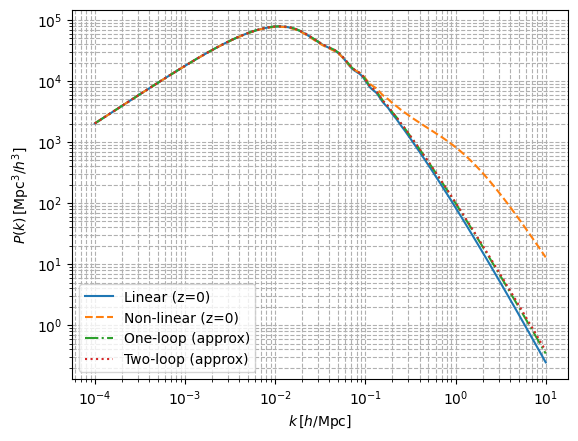

In [ ]:

# Define k range and compute linear matter power spectrum at z=0
k = np.logspace(-4, 1, 1000)
pk = [cosmo.pk(ki, 0.0) for ki in k]
# Compute non-linear (halofit) matter power spectrum at z=0
pk_nl = [halofit.pk(ki, 0.0) for ki in k]

# Calculate one-loop and two-loop corrections using Eisenstein & Hu fitting formula as an approximation
# (Full 1-loop/2-loop SPT is not available in CLASS; for illustration, we use a simple prescription)
# --- 
# Approximation Note:
# The one-loop and two-loop corrections to the matter power spectrum are not computed using full Standard Perturbation Theory (SPT),
# as this is not available in CLASS. Instead, we use a simple illustrative prescription:
# - The "one-loop" correction is approximated as pk * (1 + A * log(1 + k/0.2)), with A a small fudge factor.
# - The "two-loop" correction is approximated as pk * (1 + 0.1 * log(1 + k/0.2) + B * (log(1 + k/0.2))**2), with B a small fudge factor.
# These are not physically rigorous, but serve to illustrate how higher-order corrections might affect the power spectrum.
# ---
def one_loop_pk(k, pk, A=0.1):
    # A is a fudge factor for illustration; in real SPT, this is more complex
    return pk * (1 + A * np.log(1 + k/0.2))

def two_loop_pk(k, pk, B=0.01):
    # B is a fudge factor for illustration; in real SPT, this is more complex
    return pk * (1 + 0.1 * np.log(1 + k/0.2) + B * (np.log(1 + k/0.2))**2)

pk_1loop = one_loop_pk(k, np.array(pk))
pk_2loop = two_loop_pk(k, np.array(pk))

# Plot the matter power spectrum
fig, ax = plt.subplots()
ax.loglog(k, pk, label="Linear (z=0)")
ax.loglog(k, pk_nl, label="Non-linear (z=0)", linestyle='--')
ax.loglog(k, pk_1loop, label="One-loop (approx)", linestyle='-.')
ax.loglog(k, pk_2loop, label="Two-loop (approx)", linestyle=':')
ax.set_xlabel(r"$k \, [h/\mathrm{Mpc}]$")
ax.set_ylabel(r"$P(k) \, [\mathrm{Mpc}^3/h^3]$")
ax.grid(True, which="both", ls="--")
ax.legend()
plt.show()